In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
base = pd.read_csv('dataset.csv')
base.isna().sum()
base.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


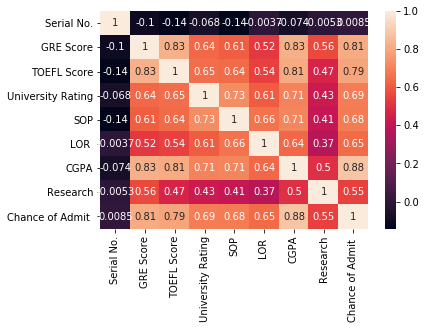

In [6]:
#heatmap
sns.heatmap(base.corr(), annot=True)

In [8]:
#chance of admit
y = base.iloc[:, -1].values

Text(0,0.5,'Chance of Admit')

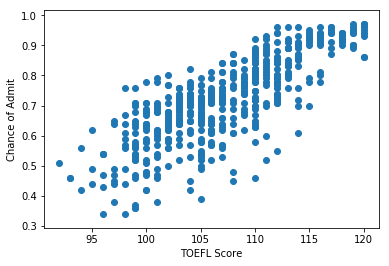

In [11]:
#toefl
toefl = base.iloc[:, 2].values
toefl = toefl.reshape(-1, 1)
plt.scatter(toefl, y)
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')

Text(0,0.5,'Chance of Admit')

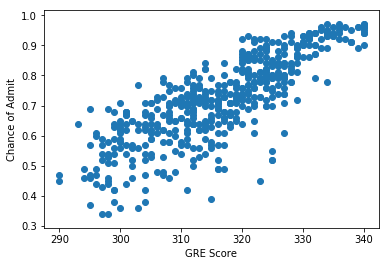

In [13]:
#gre
gre = base.iloc[:, 1].values
gre = gre.reshape(-1, 1)
plt.scatter(gre, y)
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')

Text(0,0.5,'Chance of Admit')

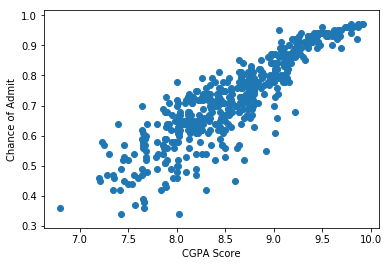

In [15]:
#cgpa
cgpa = base.iloc[:, 6].values
cgpa = cgpa.reshape(-1, 1)
plt.scatter(cgpa, y)
plt.xlabel('CGPA Score')
plt.ylabel('Chance of Admit')

In [17]:
#test and predict
x = pd.DataFrame(np.c_[toefl, gre, cgpa], columns=['toefl','gre', 'cgpa'])
x.head()

,toefl,gre,cgpa
0,118.0,337.0,9.65
1,107.0,324.0,8.87
2,104.0,316.0,8.00
3,110.0,322.0,8.67
4,103.0,314.0,8.21


In [19]:
#separa 20% to test and 80% to train
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(400, 3)
(100, 3)
(400,)
(100,)


In [21]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
r2 = r2_score(Y_train, y_train_predict)


In [22]:
print("The model performance for training set")
print("--------------------------------------")
print('R2 score is %s' %r2)
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is %s' %r2)

The model performance for training set
--------------------------------------
R2 score is 0.806069903902


The model performance for testing set
--------------------------------------
R2 score is 0.793836133004
